In [2]:
import matplotlib.pyplot as plt
import numpy as np

# PART 1

* The unit step signal is denoted as  u[n] and is defined as
* u[n]={1 for n≥0 and 0 for n<0}
 
 


In [3]:
# PART 1

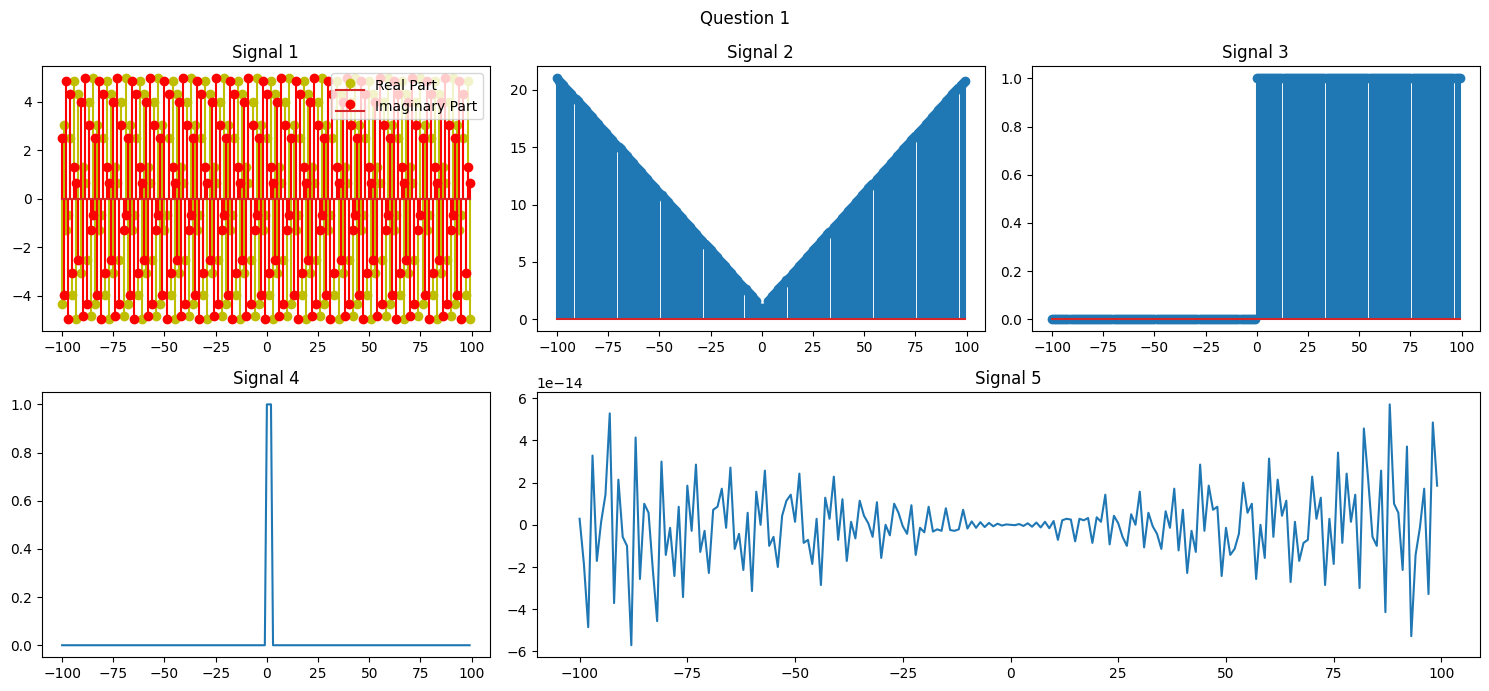

In [4]:
# Signals
def u(x):
    # unit step
    return np.array(x>=0,dtype=int)
def delta(x):
    # unit impulse 
    return 1 if x==0 else 0 
def f(x):
    return (x+1) if -1<=x and x<=0 else (1 if 0<=x and x<=2 else (3-x if 2<=x and x<=3 else 0))
def eq3(x):
    return 1 if x>=0 else 0  

n = np.arange(-100,100)
t= np.arange(-100,100)
y1 = 5 * np.exp(1j * (7 * (np.pi*n /8) + (np.pi/3)))
y2= 0.2*n* u(n+2) - 0.2*n*u(2-n)+ u(5)

#y3 =np.zeros(len(n))????
y3= np.zeros(200)
for i in range(0,200):
    y3[i]=eq3(i-100)
y4= np.zeros(200)
for i in range(len(t)):
    y4[i]=f(t[i])
y5= 5* np.sin(2*np.pi *t)*np.cos(np.pi *t -8)    

fig, ax = plt.subplots(2, 3, figsize=(15, 7))
gs = ax[1, 2].get_gridspec()
# remove the underlying axes
for a in ax[1, 1:]:
    a.remove()
axbig = fig.add_subplot(gs[1, 1:])

# Draw signals
# in py stem function 'n': a one dimensional array for x coordinates ;
# in py stem function 'y': a one dimensional array representing the y-axis ;

ax[0,0].stem(n,y1.real,label='Real Part',linefmt='y-')
ax[0,0].stem(n,y1.imag,label="Imaginary Part",linefmt='r-')
ax[0,0].legend(loc="upper right")
#ax[0,0].plot(n,y1.imag,label="Imaginary Part")
ax[0,1].stem(n, y2)
ax[0,2].stem(n, y3)
ax[1,0].plot(n, y4)
axbig.plot(n, y5)

# Write titles
ax[0,0].set_title("Signal 1")
ax[0,1].set_title("Signal 2")
ax[0,2].set_title("Signal 3")
ax[1,0].set_title("Signal 4")
axbig.set_title("Signal 5")

fig.suptitle("Question 1")

# Tighten the layout
fig.tight_layout()

plt.show()

# PART 1-B

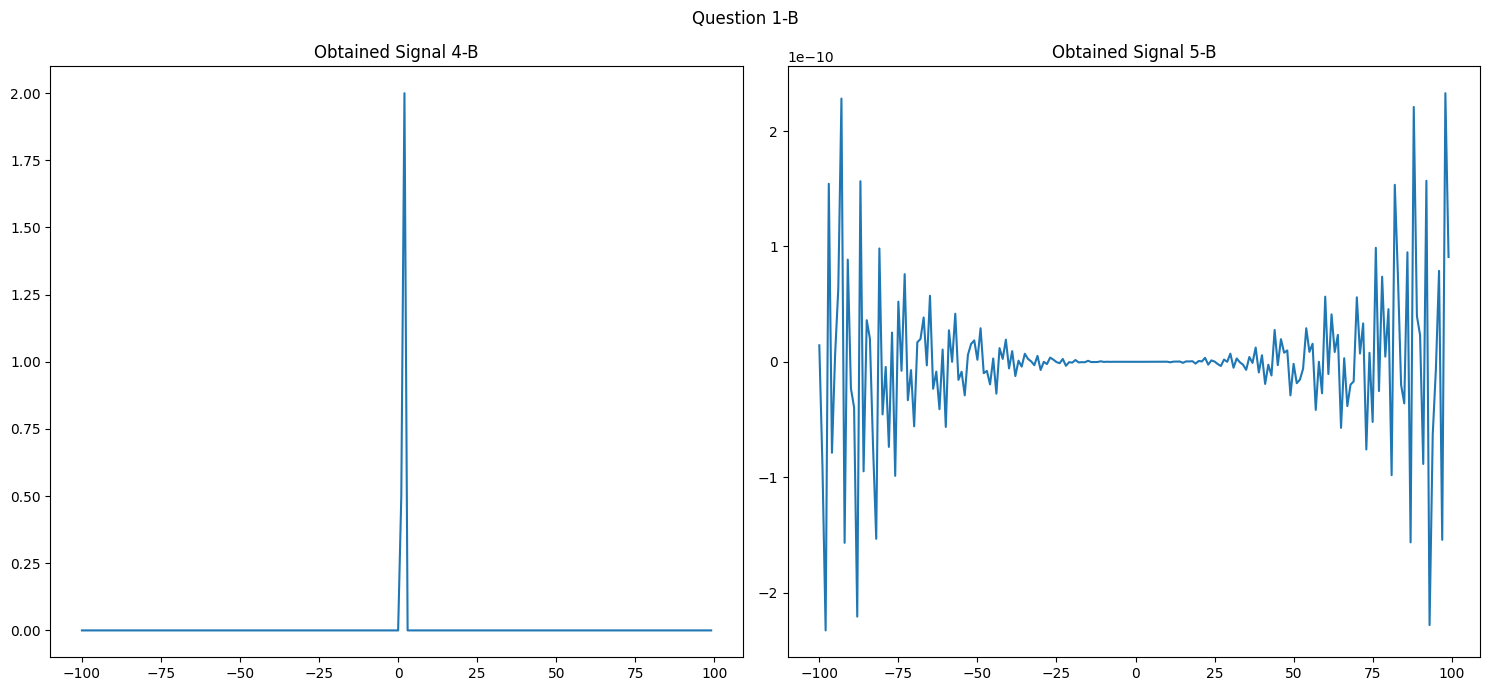

In [5]:
# PART B 
"""
For each continous signal given in A, plot the outputs for 
y(t)= tx(t/2); 
"""
def create_signal(f,t):
    f = np.nan_to_num(f) # set undefined parts of the signals to 0 
    f=f*(t/2)
    return t*f

# while implementing calculation with large negative number in trigonometric functions
# it is very possible to encounter problems owing to the limited precision of floating pointer numbers
# that is why giving a tolerance and checking it is a useful strategy such as in the following:
# y5[0]=0 if(abs(y5[0])<tolerance
tolerance= 1e-10  
t = np.arange(-100,100)
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
# We need to implement for the continous signals. 
# y1,y2 and y3 are not continous functions. 
ax[0].plot(t, create_signal(y4,t))
ax[1].plot(t, create_signal(y5,t))

ax[0].set_title("Obtained Signal 4-B")
ax[1].set_title("Obtained Signal 5-B")

fig.suptitle("Question 1-B")
fig.tight_layout()
plt.show()



# PART 1-C

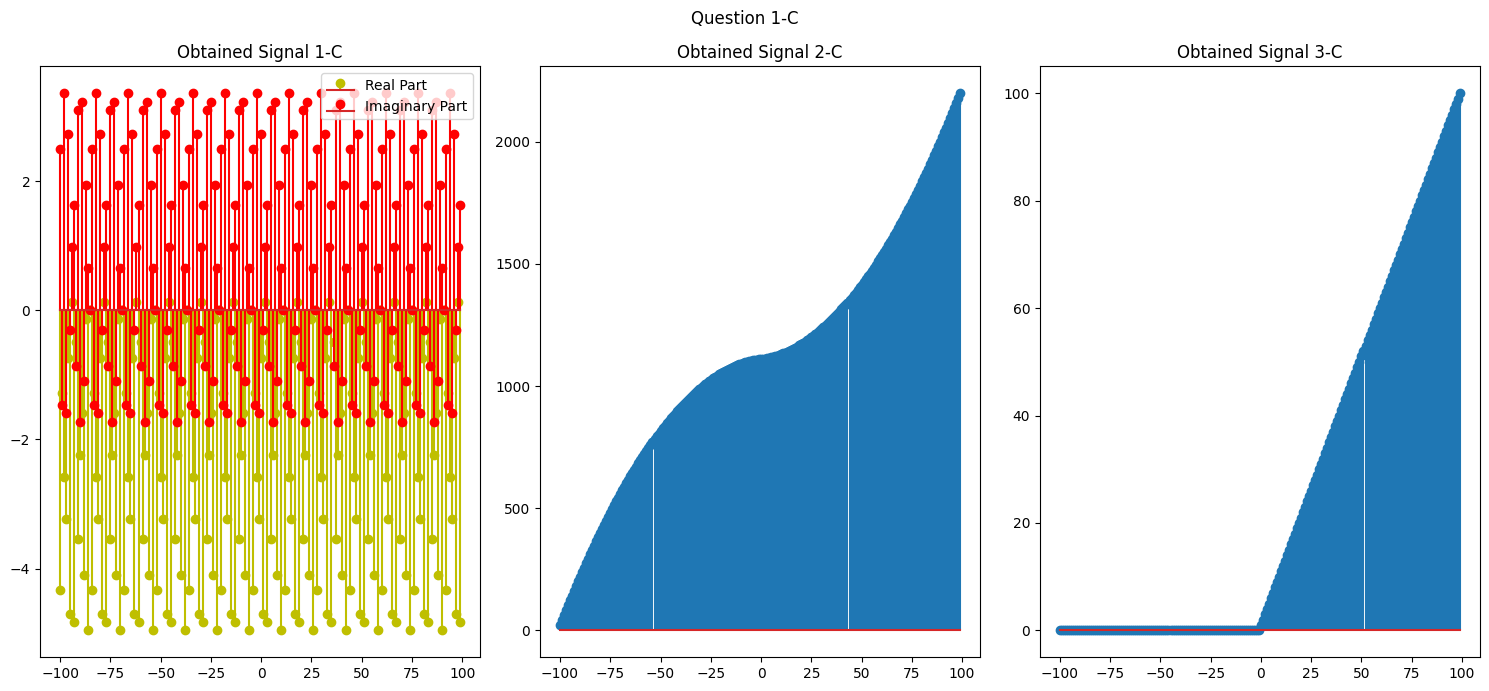

In [6]:

t=np.arange(-100,100)

# PART C
"""
First we need to detect the discrete signals and plot the outputs for y[n]= Σs[m]
"""
def obtain_signal(f,t):
    """
    For each signal given in A plot the outputs for:
    y[n]= ∑x[m] from m=-∞ to n 
    """
    f = np.nan_to_num(f) # set undefined parts of the signals to 0 
    y=np.zeros(len(f))
    for i in range(0,len(y)):
        y[i]=np.sum(f[:i+1]) # computes the sum up to i+1th element inclusively.
    return y 


t = np.arange(-100,100)
fig, ax = plt.subplots(1, 3, figsize=(15, 7))


ax[0].stem(t, obtain_signal(y1.real,t),linefmt='y-',label="Real Part")
ax[0].stem(t, obtain_signal(y1.imag,t),linefmt='r-',label="Imaginary Part")
ax[0].legend(loc="upper right")
ax[1].stem(t, obtain_signal(y2,t))
ax[2].stem(t, obtain_signal(y3,t))

ax[0].set_title("Obtained Signal 1-C")
ax[1].set_title("Obtained Signal 2-C")
ax[2].set_title("Obtained Signal 3-C")


fig.suptitle("Question 1-C")
fig.tight_layout()
plt.show()

# PART 4

Text(0.5, 1.0, 'Discrete Signal 2')

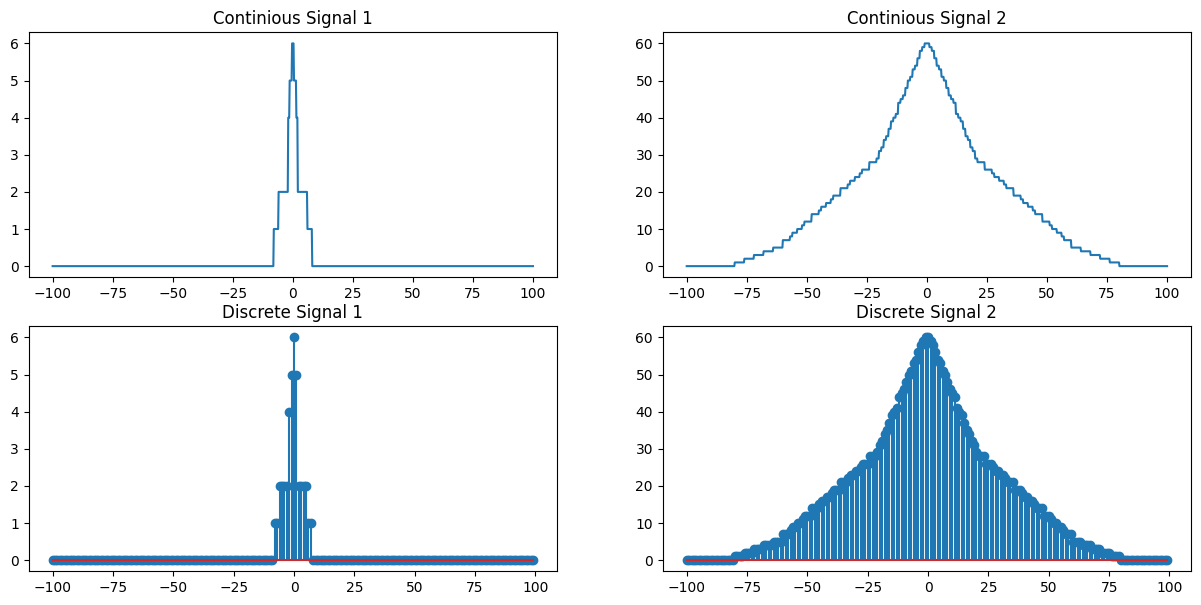

In [7]:
def unit_step(t):
    return np.array(t>=0,dtype=int)
def x1(t):
    return (unit_step(t+4)-unit_step(t-4) + unit_step(t + 3) - unit_step(t- 3)+ unit_step(t + 1)-unit_step(t-1))
def sigma(n,length):
    temp=[]
    for i in n:
        result=0
        for j in range (1,length+1):
            result +=x1(i/j)
        temp.append(result)
    return np.array(temp)

n = np.linspace(-100,100,1000)

y1= x1(n/2)+x1(2*n)
y2=sigma(n,20)
t=np.arange(-100,100,1)
y3=x1(t/2)+x1(2*t)
y4=sigma(t,20)

fig, ax = plt.subplots(2,2, figsize=(15, 7))
ax[0,0].plot(n,y1)
ax[0,0].set_title("Continious Signal 1")
ax[0,1].plot(n,y2)
ax[0,1].set_title("Continious Signal 2")
ax[1,0].stem(t,y3)
ax[1,0].set_title("Discrete Signal 1")
ax[1,1].stem(t,y4)
ax[1,1].set_title("Discrete Signal 2")